In [1]:
import pandas as pd
import numpy as np
import scipy
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN Xp (CNMeM is disabled, cuDNN 4007)


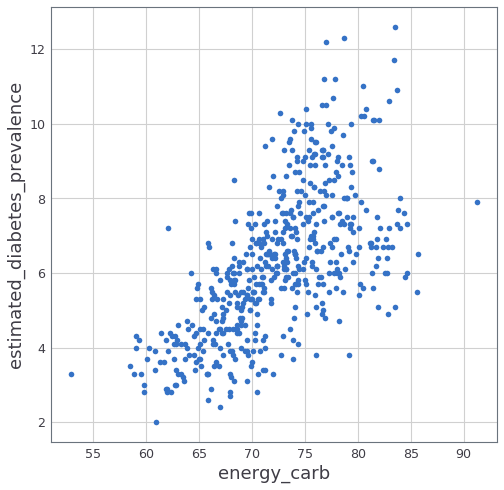

In [2]:
#df_grocery = pd.read_csv('year_ward_grocery.csv')
df_grocery = pd.read_csv('ward_grocery.csv')
df_grocery['female_perc'] = df_grocery.apply(lambda row: row['female'] / row['population'], axis=1)
df_diabetes = pd.read_csv('diabetes_estimates_osward_2016.csv', encoding='utf-8', header=0).dropna()
df_geo = pd.read_csv('london_pcd2geo_2015.csv', encoding='utf-8')
df_geo = df_geo[['osward','oslaua']]
df_geo = df_geo.drop_duplicates()

df = df_grocery.merge(df_diabetes, how='inner', left_on='area_id', right_on='osward')
df = df.merge(df_geo, how='inner', on='osward')

plt.figure(figsize=(8, 8))
plt.plot(df['energy_carb'], df['estimated_diabetes_prevalence'], 'bo')
plt.xlabel('energy_carb', size = 18)
plt.ylabel('estimated_diabetes_prevalence', size = 18)

X1=df['energy_carb'].values
X2=df['h_energy_nutrients_norm'].values
X3=df['avg_age'].values
X4=df['female_perc'].values
X5=df['num_transactions'].values
X6=df['people_per_sq_km'].values

X5 = np.array([np.log2(x) for x in X5])
X6 = np.array([np.log2(x) for x in X6])

Y=df['estimated_diabetes_prevalence'].values


oslaua2index = {}
i=0
for v in df['oslaua'].values:
    if v not in oslaua2index:
        oslaua2index[v]=i
        i += 1

df['oslaua_idx'] = df.apply(lambda row : oslaua2index[row['oslaua']], axis=1)
    
n_oslauas = n_counties = len(df['oslaua_idx'].unique())
oslaua_idx = df['oslaua_idx'].values

In [ ]:
oslaua2index = {}
i=0
for v in df['oslaua'].values:
    if v not in oslaua2index:
        oslaua2index[v]=i
        i += 1

# df['oslaua_idx'] = df.apply(lambda row : oslaua2index[row['oslaua']], axis=1)
    
# n_oslauas = n_counties = len(df['oslaua_idx'].unique())
# oslaua_idx = df['oslaua_idx'].values

In [10]:
oslaua2index

{u'E09000001': 25,
 u'E09000002': 0,
 u'E09000003': 1,
 u'E09000005': 2,
 u'E09000006': 3,
 u'E09000007': 4,
 u'E09000009': 5,
 u'E09000010': 6,
 u'E09000011': 7,
 u'E09000012': 27,
 u'E09000013': 8,
 u'E09000014': 9,
 u'E09000015': 10,
 u'E09000016': 11,
 u'E09000017': 12,
 u'E09000018': 13,
 u'E09000019': 14,
 u'E09000020': 28,
 u'E09000021': 15,
 u'E09000022': 16,
 u'E09000023': 17,
 u'E09000024': 18,
 u'E09000025': 19,
 u'E09000027': 20,
 u'E09000029': 21,
 u'E09000030': 26,
 u'E09000031': 22,
 u'E09000032': 23,
 u'E09000033': 24}

In [8]:
df_grocery.head()

,area_id,weight,volume,energy,energy_density,fat,saturate,salt,sugar,protein,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,female_perc
0,E05000026,280.291543,18.944872,187.115462,0.667574,9.488833,3.693735,0.583181,10.966254,4.977579,...,14370,7469,6901,4211,9421,738,29.572999,1.26,11404.761900,0
1,E05000027,260.564594,14.550798,188.631903,0.723935,9.733523,3.565961,0.568161,10.514314,5.211612,...,10845,5228,5617,3205,6608,1032,33.568004,1.36,7974.264706,0
2,E05000028,261.884322,16.729541,186.864095,0.713537,9.216423,3.613627,0.610543,10.689539,5.192476,...,13856,6750,7106,4180,8537,1139,32.032693,1.29,10741.085270,0
3,E05000029,238.797753,17.304347,190.783934,0.798935,9.700137,3.961264,0.533180,12.938606,4.718184,...,10850,5300,5550,3023,6251,1576,36.004793,3.38,3210.059172,0
4,E05000030,224.408538,13.610193,188.136201,0.838365,9.381808,3.614663,0.566784,11.332898,5.307003,...,11348,5515,5833,2747,6961,1640,37.247444,3.45,3289.275362,0


In [9]:
df_geo.head()

,osward,oslaua
0,E05000109,E09000006
128,E05000106,E09000006
438,E05000125,E09000006
746,E05000442,E09000023
1027,E05000454,E09000023


In [13]:
oslaua_idx

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [4]:
hierarchical_model = pm.Model()
with hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sd=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=n_oslauas)
    
    mu_b1 = pm.Normal('mu_b1', mu=0., sd=100)
    sigma_b1 = pm.HalfNormal('sigma_b1', 5.)
    b1 = pm.Normal('b1', mu=mu_b1, sd=sigma_b1, shape=n_oslauas)
    
    mu_b2 = pm.Normal('mu_b2', mu=0., sd=100)
    sigma_b2 = pm.HalfNormal('sigma_b2', 5.)
    b2 = pm.Normal('b2', mu=mu_b2, sd=sigma_b2, shape=n_oslauas)
    
    mu_b3 = pm.Normal('mu_b3', mu=0., sd=100)
    sigma_b3 = pm.HalfNormal('sigma_b3', 5.)
    b3 = pm.Normal('b3', mu=mu_b3, sd=sigma_b3, shape=n_oslauas)
    
    mu_b4 = pm.Normal('mu_b4', mu=0., sd=100)
    sigma_b4 = pm.HalfNormal('sigma_b4', 5.)
    b4 = pm.Normal('b4', mu=mu_b4, sd=sigma_b4, shape=n_oslauas)
    
    mu_b5 = pm.Normal('mu_b5', mu=0., sd=100)
    sigma_b5 = pm.HalfNormal('sigma_b5', 5.)
    b5 = pm.Normal('b5', mu=mu_b5, sd=sigma_b5, shape=n_oslauas)
    
    mu_b6 = pm.Normal('mu_b6', mu=0., sd=100)
    sigma_b6 = pm.HalfNormal('sigma_b6', 5.)
    b6 = pm.Normal('b6', mu=mu_b6, sd=sigma_b6, shape=n_oslauas)
    
    # Model error
    eps = pm.HalfCauchy('eps', 5.)
    
    estimate = a[oslaua_idx] + b1[oslaua_idx]*X1 + b2[oslaua_idx]*X2 + b3[oslaua_idx]*X3 + b4[oslaua_idx]*X4 + b5[oslaua_idx]*X5 + b6[oslaua_idx]*X6

    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('likelihood', mu=estimate, sd=eps, observed=Y)

In [6]:
with hierarchical_model:
    hierarchical_trace = pm.sample(10000, tune=10000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -939.91: 100%|██████████| 200000/200000 [01:53<00:00, 1762.28it/s]
Finished [100%]: Average ELBO = -939.73
 42%|████▏     | 4188/10000 [35:18<3:41:40,  2.29s/it] 

In [7]:
ppc = pm.sample_posterior_predictive(hierarchical_trace, samples=10000, model=hierarchical_model)

AttributeError: 'module' object has no attribute 'sample_posterior_predictive'